# Transformer
[link](https://arxiv.org/abs/1706.03762)  
[tf code](https://github.com/tensorflow/tensor2tensor)  
[video](https://www.youtube.com/watch?v=TQQlZhbC5ps)  

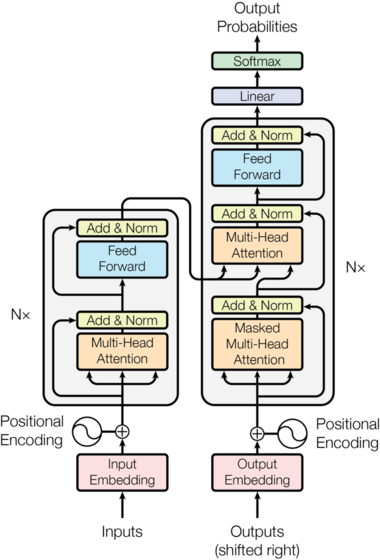

## Embedding

In [4]:
import torch
from torch import nn

embedding = nn.Embedding(10, 3)
embedding

Embedding(10, 3)

In [5]:
inp = torch.LongTensor([[1, 2, 4, 5], [4, 3, 2, 9]])
embedding(inp)

tensor([[[ 0.2299,  1.1918, -0.8698],
         [-0.2693, -0.2281, -0.1208],
         [ 0.4933,  1.4902, -0.3925],
         [ 0.5087,  1.1503,  0.3707]],

        [[ 0.4933,  1.4902, -0.3925],
         [ 0.2813,  0.4758, -0.2372],
         [-0.2693, -0.2281, -0.1208],
         [-1.1661,  1.2184, -0.2553]]], grad_fn=<EmbeddingBackward>)

In [9]:
embedding

Embedding(10, 3)

In [10]:
class Embedder(nn.Module):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_model)

    def forward(self, x):
        return self.embed(x)

## Positional Embedding 

In [12]:
class PositionalEncoder(nn.Module):
    def __init__(self, d_model, max_seq_len=80):
        super().__init__()
        self.d_model = d_model

        # create constant 'pe' matrix with values dependant on
        # pos and i
        pe = torch.zeros(max_seq_len, d_model)
        for pos in range(max_seq_len):
            for i in range(0, d_model, 2):
                pe[pos, i] = math.sin(pos / (10000 ** ((2 * i) / d_model)))
                pe[pos, i + 1] = math.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))

        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        # make embeddings relatively larger
        x = x * math.sqrt(self.d_model)
        # add constant to embedding
        seq_len = x.size(1)
        x = x + th.tensor(self.pe[:, :seq_len], requires_grad=False)
        return x

## Self-Attention Explained
[link](http://jalammar.github.io/illustrated-transformer/)  

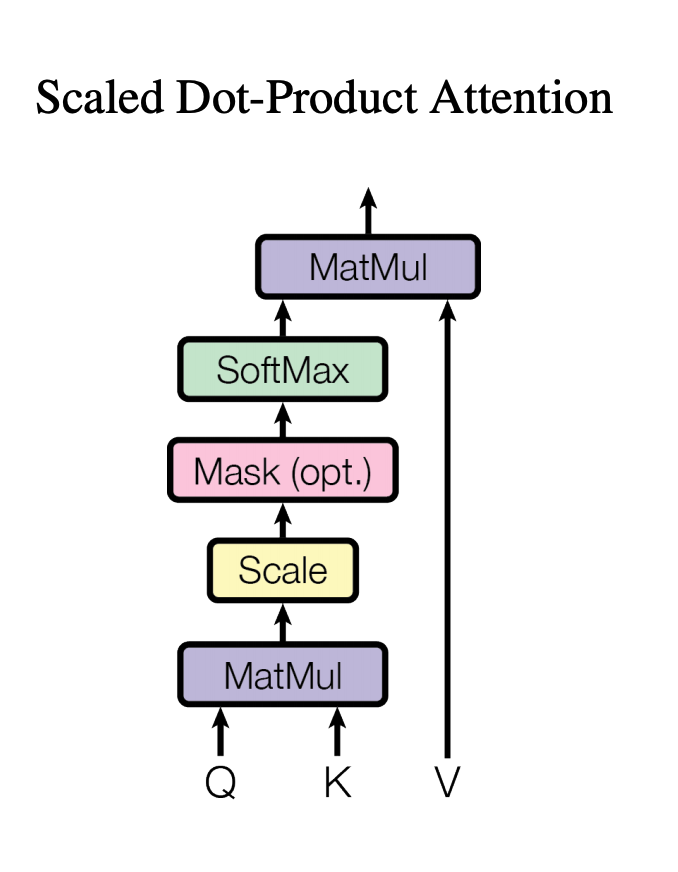  
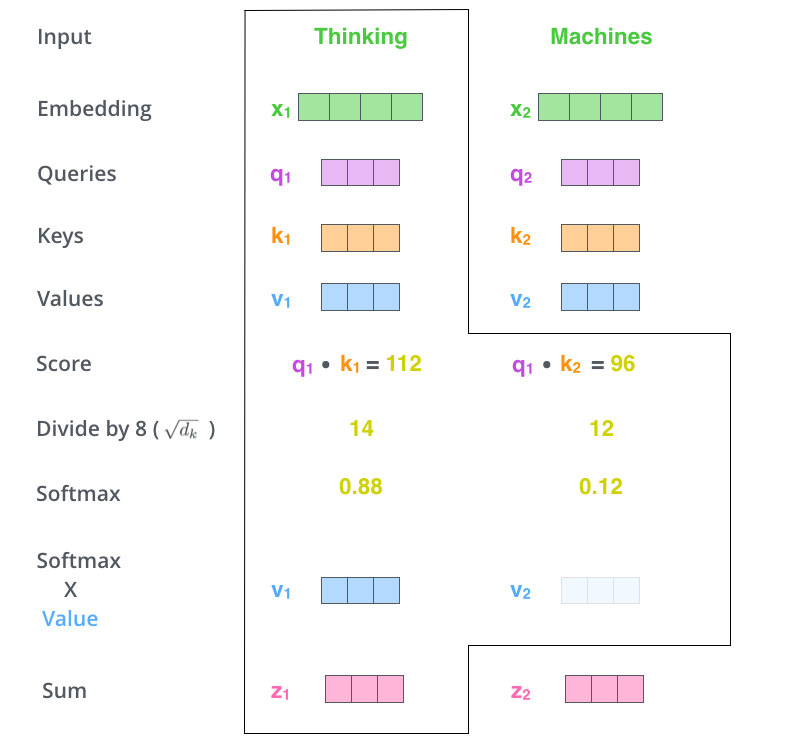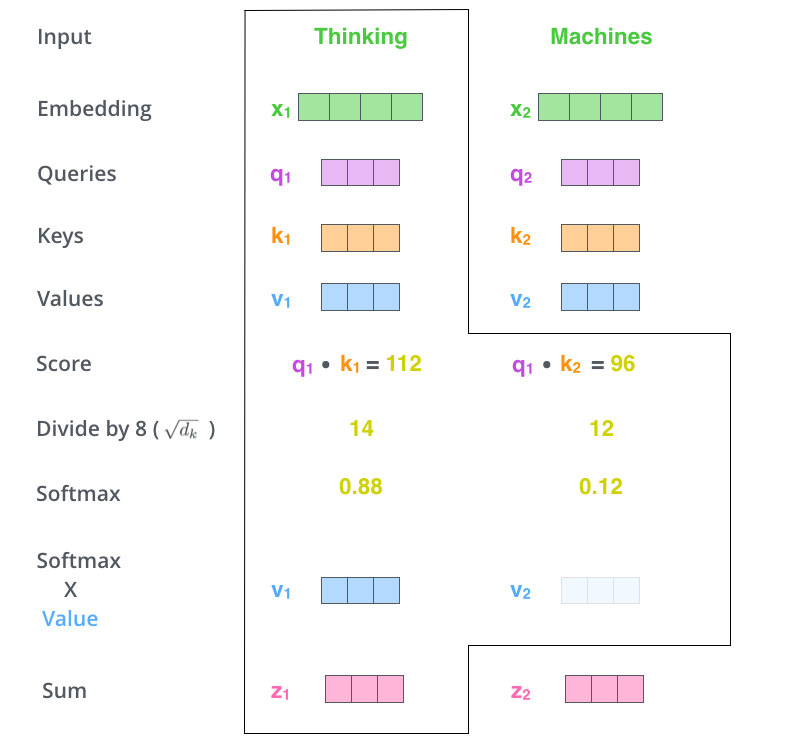

## Multi-Headed Attention

In [13]:
def attention(q, k, v, d_k, mask=None, dropout=None):    
    scores = torch.matmul(q, k.transpose(-2, -1)) /  math.sqrt(d_k)

class MultiHeadAttention(nn.Module):
    def __init__(self, heads, d_model, dropout = 0.1):
        super().__init__()
        
        self.d_model = d_model
        self.d_k = d_model // heads
        self.h = heads
        
        self.q_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(d_model, d_model)
    
    def forward(self, q, k, v, mask=None):
        
        bs = q.size(0)
        
        # perform linear operation and split into h heads
        
        k = self.k_linear(k).view(bs, -1, self.h, self.d_k)
        q = self.q_linear(q).view(bs, -1, self.h, self.d_k)
        v = self.v_linear(v).view(bs, -1, self.h, self.d_k)
        
        # transpose to get dimensions bs * h * sl * d_model
       
        k = k.transpose(1,2)
        q = q.transpose(1,2)
        v = v.transpose(1,2)
        # calculate attention using function we will define next
        scores = attention(q, k, v, self.d_k, mask, self.dropout)
        
        # concatenate heads and put through final linear layer
        concat = scores.transpose(1,2).contiguous().view(bs, -1, self.d_model)
        
        output = self.out(concat)
    
        return output

## Mask

In [ ]:
batch = next(iter(train_iter))
input_seq = batch.English.transpose(0,1)
input_pad = EN_TEXT.vocab.stoi['<pad>']
# creates mask with 0s wherever there is padding in the input
input_msk = (input_seq != input_pad).unsqueeze(1)

target_seq = batch.French.transpose(0,1)
target_pad = FR_TEXT.vocab.stoi['<pad>']
target_msk = (target_seq != target_pad).unsqueeze(1)
size = target_seq.size(1) # get seq_len for matrix
nopeak_mask = np.triu(np.ones(1, size, size),
k=1).astype('uint8')
nopeak_mask = Variable(torch.from_numpy(nopeak_mask) == 0)
target_msk = target_msk & nopeak_mask